In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

cv2.setRNGSeed(0)

<!-- 1. erosion
2. dilation
3. opening
4. closing
5. histogram
6. equalization
7. hough transform -->


In [ ]:
take thresholder image, 

gradient sweet spot 
thresholding:no of conn components vs dilations

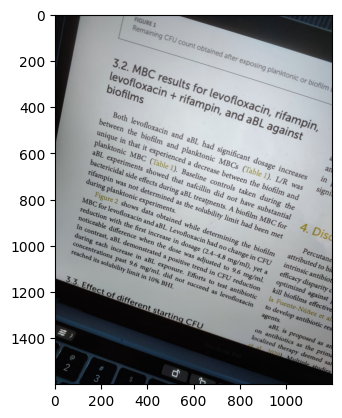

In [2]:
# image = cv2.imread('./data/queries/1.jpeg')
image = cv2.imread('/home/csgrad/indratej/my_projects/incidental_capture/mobile_retriever/data/queries/cam_cap.jpeg')
plt.imshow(image)

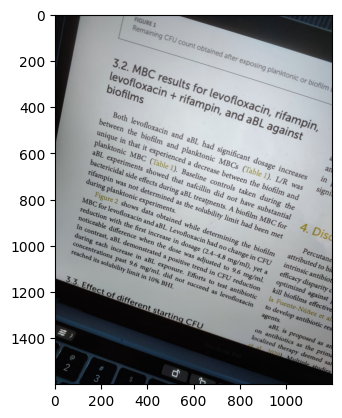

In [3]:
cc_image = cv2.resize(image,(600,800),interpolation = cv2.INTER_LINEAR)
cc_gray = cv2.cvtColor(cc_image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

In [8]:
def plot_conn_comps(thresh):
    totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(thresh,4,cv2.CV_32S) # type: ignore #4 is for connectivity
    df = generate_stats(totalLabels,stats, centroid)
    output = image.copy() #np.zeros(image.shape)#image.copy() 
    if comps is None:
        comps = df['label_id'].values
    for comp in comps:
        x, y, w, h, area = df[df['label_id'] == comp][['left','top','width','height','area']].values[0]
        dist = thresh[x:x+w,y:y+h].mean().round(2)
        # if dist == 0:
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # print(comp,":",dist, area,(w,h),(x, y), (x + w, y + h),thresh[x:x+w,y:y+h])
    print("no:", totalLabels-1)
    plt.imshow(output)
    plt.title("components")
    plt.show()

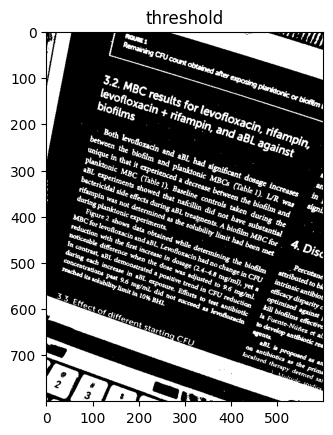

n-components: 597


NameError: name 'plot_conn_comps' is not defined

In [4]:
thresh = cv2.adaptiveThreshold(cc_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,129,4)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~thresh,4,cv2.CV_32S) # type: ignore #4 is for connectivity
plt.imshow(~thresh, cmap='gray')
plt.title("threshold")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~thresh.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~thresh,cc_image)

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 1)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~erosion,4,cv2.CV_32S)
plt.imshow(~erosion, cmap='gray')
plt.title("erosion")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~erosion.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~erosion,cc_image)

kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 1)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~dilation,4,cv2.CV_32S)
plt.imshow(~dilation, cmap='gray')
plt.title("dilation")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~dilation.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~dilation,cc_image)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~opening,4,cv2.CV_32S)
plt.imshow(~opening, cmap='gray')
plt.title("opening")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~opening.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~opening,cc_image)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~closing,4,cv2.CV_32S)
plt.imshow(~closing, cmap='gray')
plt.title("closing")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~closing.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~closing,cc_image)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~gradient,4,cv2.CV_32S)
plt.imshow(~gradient, cmap='gray')
plt.title("gradient")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~gradient.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~gradient,cc_image)

In [ ]:
thresh = cv2.adaptiveThreshold(cc_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,129,4)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~thresh,4,cv2.CV_32S) # type: ignore #4 is for connectivity
plt.imshow(~thresh, cmap='gray')
plt.title("threshold")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~thresh.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~thresh,cc_image)

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 2)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~erosion,4,cv2.CV_32S)
plt.imshow(~erosion, cmap='gray')
plt.title("erosion")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~erosion.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~erosion,cc_image)

kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 2)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~dilation,4,cv2.CV_32S)
plt.imshow(~dilation, cmap='gray')
plt.title("dilation")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~dilation.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~dilation,cc_image)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~opening,4,cv2.CV_32S)
plt.imshow(~opening, cmap='gray')
plt.title("opening")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~opening.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~opening,cc_image)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~closing,4,cv2.CV_32S)
plt.imshow(~closing, cmap='gray')
plt.title("closing")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~closing.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~closing,cc_image)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~gradient,4,cv2.CV_32S)
plt.imshow(~gradient, cmap='gray')
plt.title("gradient")
plt.show()
print("n-components:",totalLabels-1)
# pd.Series(~gradient.flatten()).hist(bins=256)
# plt.show()
plot_conn_comps(~gradient,cc_image)

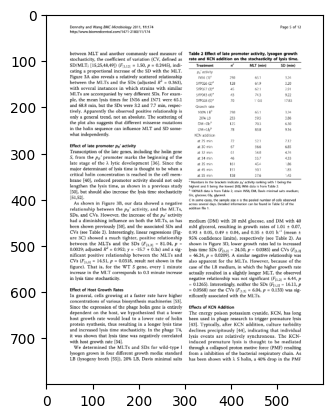

In [55]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

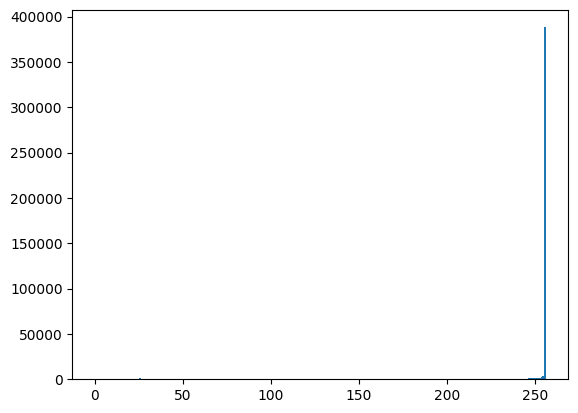

In [56]:
plt.hist(img.ravel(),256,[0,256])
plt.show()


<Axes: >

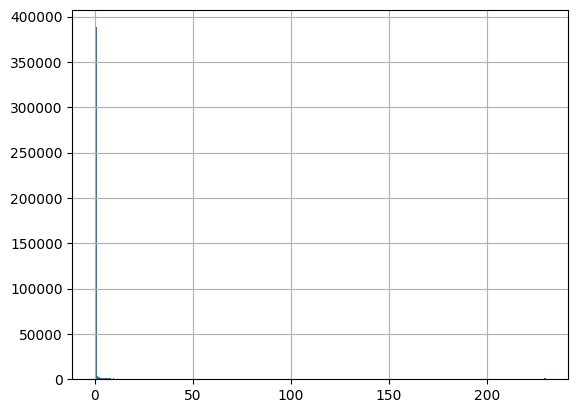

In [59]:
pd.Series(~img.flatten()).hist(bins=256)

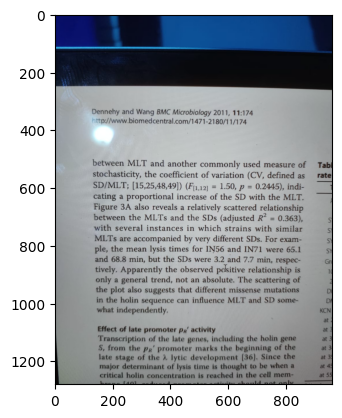

In [58]:
cc_image = cv2.imread('./data/queries/1.jpeg')
plt.imshow(cc_image)

<Axes: >

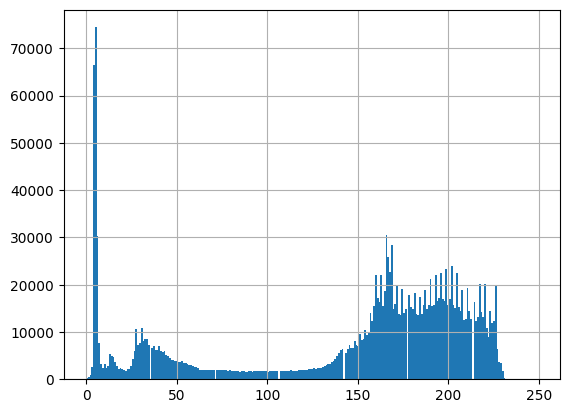

In [3]:
cc_gray = cv2.cvtColor(cc_image, cv2.COLOR_BGR2GRAY)
pd.Series(cc_gray.flatten()).hist(bins=256)

<Axes: >

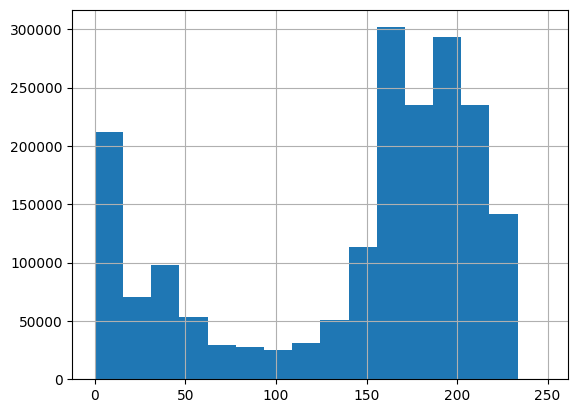

In [16]:
pd.Series(cc_gray.flatten()).hist(bins=16)

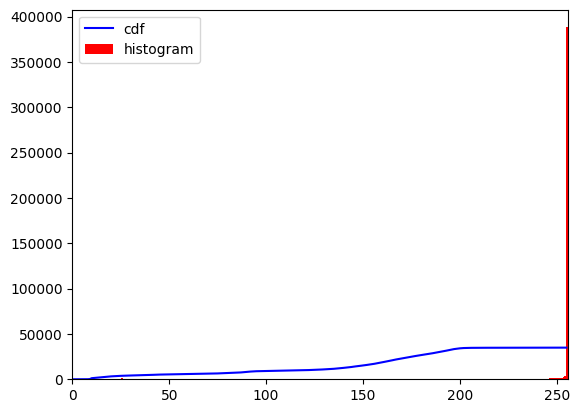

In [63]:
hist,bins = np.histogram(cc_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


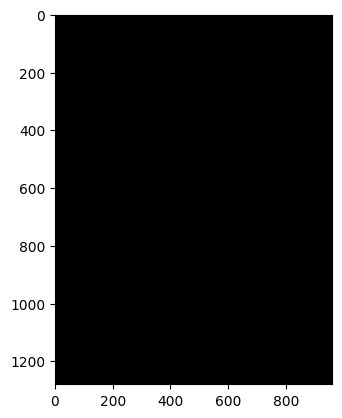

In [66]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[cc_image]
plt.imshow(img2)

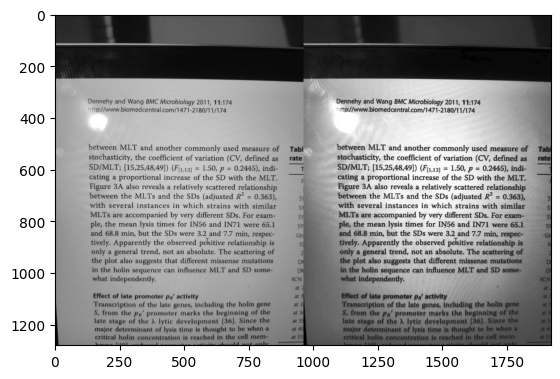

In [72]:
equ = cv2.equalizeHist(cc_gray)
res = np.hstack((cc_gray,equ)) #stacking images side-by-side
plt.imshow(res,cmap='gray')

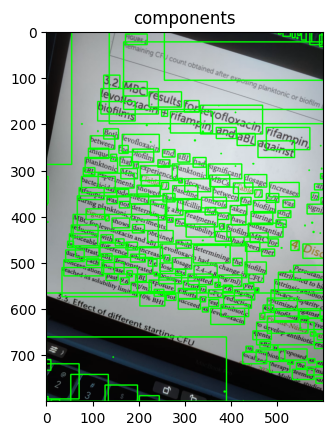

In [9]:
thresh = cv2.adaptiveThreshold(cc_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,129,4)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
result = 255 - opening
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(result,4,cv2.CV_32S)
df = generate_stats(totalLabels,stats, centroid)
output = cc_image.copy() 
count = 0
theta = np.arctan(70/140)
for comp in df['label_id'].values:
    x, y, w, h, area = df[df['label_id'] == comp][['left','top','width','height','area']].values[0]
    a = x*np.cos(theta)-y*np.sin(theta)
    b = x*np.sin(theta)+y*np.cos(theta)
    m = (x+w)*np.cos(theta)-(y+h)*np.sin(theta)
    n = (x+w)*np.sin(theta)+(y+h)*np.cos(theta)
    cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)
    # if(count == 250):
    #     break
    # else:
    #     count += 1
plt.imshow(output)
plt.title("components")
plt.show()

In [39]:
cc.shape

(71, 146, 3)

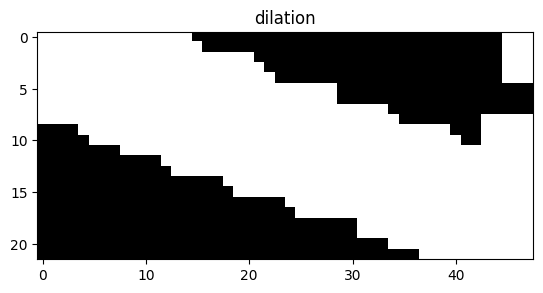

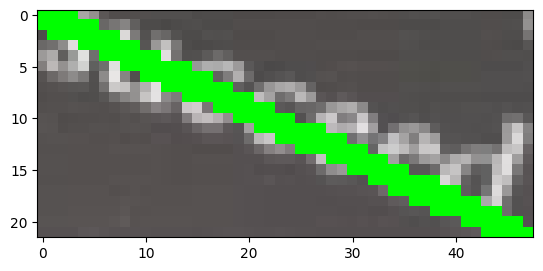

In [17]:
plt.imshow(cc)
img = cv2.cvtColor(cc.copy(), cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,129,4)
kernel = np.ones((3,3),np.uint8)
dilation = cv2.erode(thresh,kernel,iterations = 2)
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(~dilation,4,cv2.CV_32S)
plt.imshow(~dilation, cmap='gray')
plt.title("dilation")
plt.show()

rect = cv2.minAreaRect(np.array([[[0,0],[w,h]]]))
box = cv2.boxPoints(rect)
box = np.int0(box)
cc_min = cv2.drawContours(~cc.copy(),[box],0,(0,255,0),2)
plt.imshow(cc_min)
plt.show()

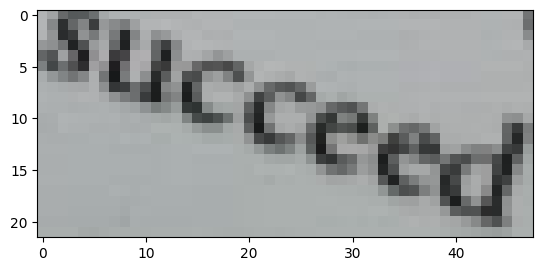

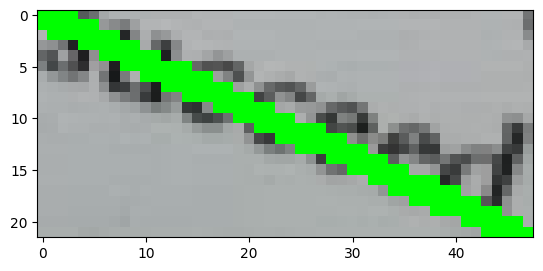

In [10]:
x, y, w, h, area = df[df['label_id'] == 200][['left','top','width','height','area']].values[0]
cc = cc_image[y:y+h,x:x+w].copy()
plt.imshow(cc, cmap='gray')
plt.show()

rect = cv2.minAreaRect(np.array([[[0,0],[w,h]]]))
box = cv2.boxPoints(rect)
box = np.int0(box)
cc_min = cv2.drawContours(cc.copy(),[box],0,(0,255,0),2)
plt.imshow(cc_min)
plt.show()

In [11]:
box 

array([[48, 22],
       [48, 22],
       [ 0,  0],
       [ 0,  0]])

In [31]:
np.arctan(h/w)

0.4526287712258518

In [ ]:
cc = 

In [ ]:
# x, y, w, h, area = df[df['label_id'] == 200][['left','top','width','height','area']].values[0]
cc = cc_image[y:y+h,x:x+w].copy()
# plt.imshow(cc, cmap='gray')
# plt.show()

# rect = cv2.minAreaRect(np.array([[[0,0],[w,h]]]))
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# cc_min = cv2.drawContours(cc.copy(),[box],0,(0,255,0),2)
# plt.imshow(cc_min)
# plt.show()

In [7]:
def generate_stats(totalLabels,stats, centroids):
    '''
    totalLabels,stats, centroids : cv2 connectedComponentsWithStats outputs
    '''
    columns = ['label_id', 'left','top','width','height','area','centroid_x','centroid_y']
    df = pd.DataFrame(columns=columns)
    df['label_id'] = [i for i in range(1,totalLabels+1)]
    df['left'] = stats[:,0]
    df['top'] = stats[:,1]
    df['width'] = stats[:,2]
    df['height'] = stats[:,3]
    df['area'] = stats[:,4]
    df['centroid_x'] = centroids[:,0]
    df['centroid_y'] = centroids[:,1]
    return df

In [5]:
def print_components(thresh):
    totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(thresh,4,cv2.CV_32S) # type: ignore #4 is for connectivity
    df = generate_stats(totalLabels,stats, centroid)
    return totalLabels-1
    # output = image.copy() #np.zeros(image.shape)#image.copy() 
    # if comps is None:
    #     comps = df['label_id'].values
    # for comp in comps:
    #     x, y, w, h, area = df[df['label_id'] == comp][['left','top','width','height','area']].values[0]
    #     dist = thresh[x:x+w,y:y+h].mean().round(2)
    #     # if dist == 0:
    #     cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #         # print(comp,":",dist, area,(w,h),(x, y), (x + w, y + h),thresh[x:x+w,y:y+h])
    # print("no:", totalLabels-1)
    # plt.imshow(output)
    # plt.title("components")
    # plt.show()
    

def threshold(image):
    #simple thresh
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,129,4)
    print("thresh",print_components(~thresh))
    plt.imshow(~thresh,cmap='gray')
    plt.show()

    #erosion
    kernel = np.ones((3,3),np.uint8)
    erosion = thresh.copy()
    for i in range(10):
        erosion = cv2.erode(erosion,kernel,iterations = i)
        print("erosion(3,3)-",i,print_components(~erosion))
        plt.imshow(~erosion,cmap='gray')
        plt.show()

    # #dilation
    # kernel = np.ones((3,3),np.uint8)
    # dilation = thresh.copy()
    # for i in range(10):
    #     dilation = cv2.dilate(dilation,kernel,iterations = i)
    #     print("dilation(3,3)-",i,print_components(~dilation))


    # #erosion
    # kernel = np.ones((5,5),np.uint8)
    # erosion = thresh.copy()
    # for i in range(10):
    #     erosion = cv2.erode(erosion,kernel,iterations = i)
    #     print("erosion(5,5)-",i,print_components(~erosion))

    #  #dilation
    # kernel = np.ones((5,5),np.uint8)
    # dilation = thresh.copy()
    # for i in range(10):
    #     dilation = cv2.dilate(dilation,kernel,iterations = i)
    #     print("dilation(5,5)-",i,print_components(~dilation))

    
    # #opening
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    # opening = thresh.copy()
    # for i in range(10):
    #     opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)   
    #     print("opening(3,3)-",i,print_components(~opening))

    # #closing
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    # closing = thresh.copy()
    # for i in range(10):
    #     closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)   
    #     print("closing(3,3)-",i,print_components(~closing))

    # #opening
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    # opening = thresh.copy()
    # for i in range(10):
    #     opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)   
    #     print("opening(5,5)-",i,print_components(~opening))

    # #closing
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    # closing = thresh.copy()
    # for i in range(10):
    #     closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)   
    #     print("closing(5,5)-",i,print_components(~closing))
    
threshold(cc_image)

NameError: name 'generate_stats' is not defined